In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Database Rp - sample.csv")

In [3]:
df.head()

,sr no,Content,target
0,1,"First of all, I want to remind you of your str...",ai
1,2,"You have achieved so much already, and you hav...",ai
2,3,Remember the times when you faced challenges a...,ai
3,4,"At the same time, it's important to acknowledg...",ai
4,5,"During those times, it's okay to take a step b...",ai


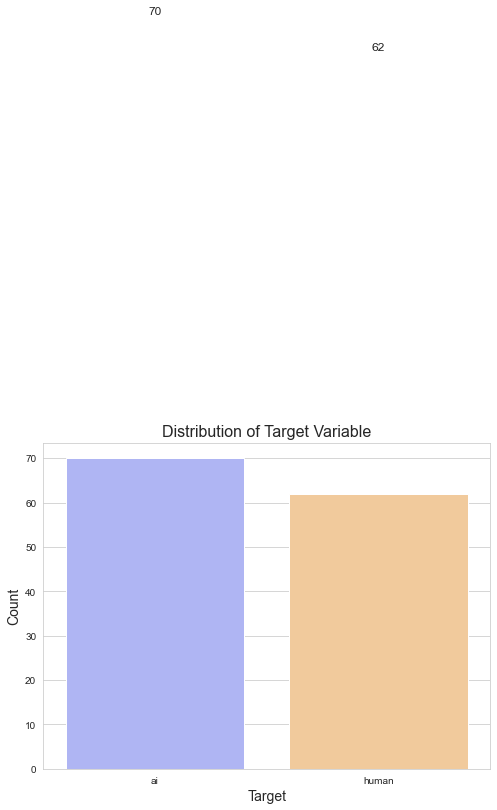

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(8,6))

# Define the colors of the bars in the countplot
colors = ["#a3acff", "#ffcb8e"]

# Create the countplot
sns.countplot(data=df, x="target", palette=colors)

for i in range(len(df["target"].value_counts())):
    count = df["target"].value_counts()[i]
    plt.text(i, count+100, f"{count:,}", ha='center', fontsize=12)


# Set the x and y axis labels
plt.xlabel("Target", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Set the title of the plot
plt.title("Distribution of Target Variable", fontsize=16)

# Show the plot
plt.show()


In [5]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Xfeatures = df['Content']
ylabels = df['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)

In [6]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [7]:
pipe_lr.score(x_test,y_test)


0.85

In [8]:
pipe_lr.predict(["It often involves feelings of warmth, tenderness, admiration, and a desire to be close to the person you love."])

array(['ai'], dtype=object)

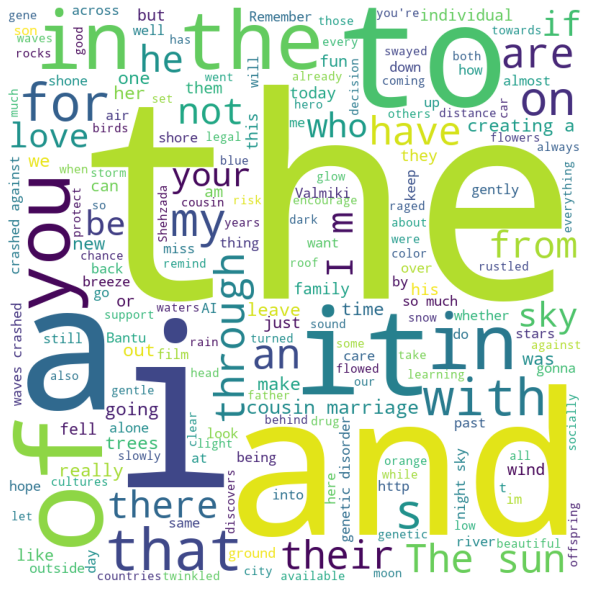

In [9]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['Content']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [10]:
dfshuffle = df.sample(frac=1, random_state=42)

In [11]:
dfshuffle.head(4)

,sr no,Content,target
56,57,"The snow piled up outside, creating a winter w...",ai
83,84,Nikki Haley keeps saying how much she makes li...,human
19,20,The city was bustling with activity and noise.,ai
31,32,"The river flowed calmly, reflecting the blue s...",ai


In [12]:
df1= df[:69]  # entries from 0 to 68
df2= df[69:]  # entries from 69 to the end


In [13]:
df1.head()

,sr no,Content,target
0,1,"First of all, I want to remind you of your str...",ai
1,2,"You have achieved so much already, and you hav...",ai
2,3,Remember the times when you faced challenges a...,ai
3,4,"At the same time, it's important to acknowledg...",ai
4,5,"During those times, it's okay to take a step b...",ai


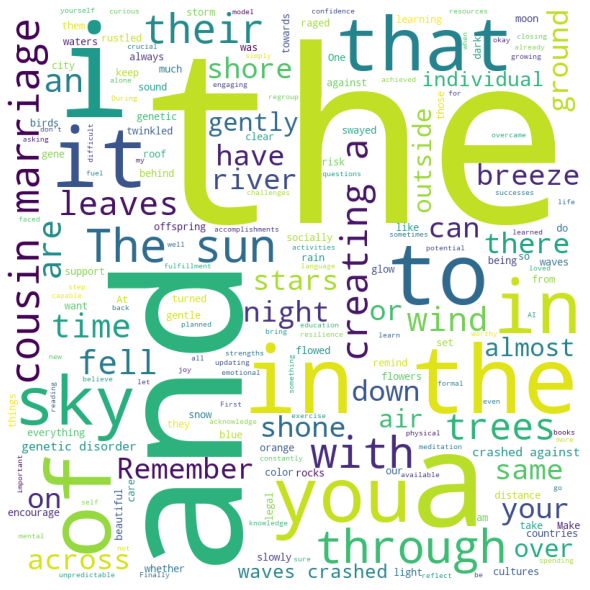

In [14]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df1['Content']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [15]:
df2.head()

,sr no,Content,target
69,70,"Ultimately, whether or not to marry a cousin i...",ai
70,71,Bantu has grown up suffering his father Valmik...,human
71,72,He moves into their mansion to protect them fr...,human
72,73,"The film, which is a remake of a Telugu film A...",human
73,74,"For 25 years, Valmiki’s son Bantu is trapped i...",human


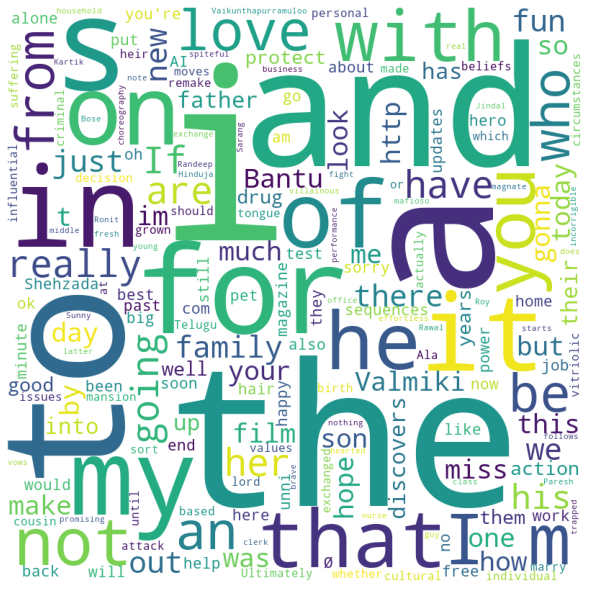

In [16]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df2['Content']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [17]:

Xfeatures = dfshuffle['Content']
ylabels = dfshuffle['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)



0.875

In [18]:
from sklearn.ensemble import RandomForestClassifier

Xfeatures = df['Content']
ylabels = df['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.625

In [19]:
from sklearn import svm

Xfeatures = df['Content']
ylabels = df['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',svm.SVC(kernel='linear', C=1, random_state=0))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.85

In [20]:
# Importing necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Creating the pipeline for feature extraction and model training
pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('nn', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
])

# Splitting the data into training and testing sets
Xfeatures = dfshuffle['Content']
ylabels = dfshuffle['target']
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=98)

# Fitting the model to the training data
pipeline.fit(x_train, y_train)

# Evaluating the model on the testing data
score = pipeline.score(x_test, y_test)

# Printing the accuracy score
print("Accuracy: ", score)


Accuracy:  0.9


In [21]:
prediction = pipeline.predict(["We define the RNN model architecture using Sequential, Embedding, LSTM, and Dense layers"])
prediction

array(['ai'], dtype='<U5')

In [22]:
prediction = pipeline.predict(["Finally, we print the test accuracy of the model."])
prediction

array(['ai'], dtype='<U5')

In [23]:
prediction = pipeline.predict(["tommorow we have nlp lab"])
prediction

array(['human'], dtype='<U5')

In [24]:
prediction = pipeline.predict(["We are getting started on your order right away, and you will receive an order confirmation email shortly to devanshguptahero@gmail.com"])
prediction

array(['human'], dtype='<U5')

In [25]:
prediction = pipeline.predict(["Big Monopolies built on public leverage do not help India. "])
prediction

array(['human'], dtype='<U5')

In [26]:
prediction = pipeline.predict(["Large corporations that prioritize profits over social responsibility do not benefit society as a whole"])
prediction

array(['human'], dtype='<U5')

In [27]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the pre-processing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text
df["clean_data"] = df["Content"].apply(preprocess_text)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1129)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1129)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1129)>


In [28]:
df

,sr no,Content,target,clean_data
0,1,"First of all, I want to remind you of your str...",ai,first want remind strength accomplishment
1,2,"You have achieved so much already, and you hav...",ai,achieved much already much potential even
2,3,Remember the times when you faced challenges a...,ai,remember time faced challenge overcame let suc...
3,4,"At the same time, it's important to acknowledg...",ai,time important acknowledge life difficult unpr...
4,5,"During those times, it's okay to take a step b...",ai,time okay take step back reflect regroup
...,...,...,...,...
127,128,MAYDAY?!,human,mayday
128,129,RATT ROCKED NASHVILLE TONITE..ONE THING SUCKED...,human,ratt rocked nashville toniteone thing sucked e...
129,130,I love to! But I`m only available from 5pm. an...,human,love im available pm dear would love help conv...
130,131,The girl in the hair salon asked me 'Shall I t...,human,girl hair salon asked shall trim eyebrow old feel


In [29]:
# Importing necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Creating the pipeline for feature extraction and model training
pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('nn', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
])

# Splitting the data into training and testing sets
Xfeatures = df['clean_data']
ylabels = df['target']
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=98)

# Fitting the model to the training data
pipeline.fit(x_train, y_train)

# Evaluating the model on the testing data
score = pipeline.score(x_test, y_test)

# Printing the accuracy score
print("Accuracy: ", score)


Accuracy:  0.875


In [30]:
from sklearn import svm

Xfeatures = df['clean_data']
ylabels = df['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',svm.SVC(kernel='linear', C=1, random_state=0))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.85